<a href="https://colab.research.google.com/github/trefftzc/trefftzc/blob/main/facility_location_with_population_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Facility Location considering population density and pygad

In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

Distances to the closest seed: 
0.00 1.00 2.00 3.00 4.00 5.00 6.00 7.00 7.00 6.00 5.00 4.00 3.00 2.00 1.00 0.00 
1.00 1.41 2.24 3.16 4.12 5.10 6.08 7.07 7.07 6.08 5.10 4.12 3.16 2.24 1.41 1.00 
2.00 2.24 2.83 3.61 4.47 5.39 6.32 7.28 7.28 6.32 5.39 4.47 3.61 2.83 2.24 2.00 
3.00 3.16 3.61 4.24 5.00 5.83 6.71 7.62 7.62 6.71 5.83 5.00 4.24 3.61 3.16 3.00 
4.00 4.12 4.47 5.00 5.66 6.40 7.21 8.06 8.06 7.21 6.40 5.66 5.00 4.47 4.12 4.00 
5.00 5.10 5.39 5.83 6.40 7.07 7.81 8.60 8.60 7.81 7.07 6.40 5.83 5.39 5.10 5.00 
6.00 6.08 6.32 6.71 7.21 7.81 8.49 9.22 9.22 8.49 7.81 7.21 6.71 6.32 6.08 6.00 
7.00 7.07 7.28 7.62 8.06 8.60 9.22 9.90 9.90 9.22 8.60 8.06 7.62 7.28 7.07 7.00 
7.00 7.07 7.28 7.62 8.06 8.60 9.22 9.90 9.90 9.22 8.60 8.06 7.62 7.28 7.07 7.00 
6.00 6.08 6.32 6.71 7.21 7.81 8.49 9.22 9.22 8.49 7.81 7.21 6.71 6.32 6.08 6.00 
5.00 5.10 5.39 5.83 6.40 7.07 7.81 8.60 8.60 7.81 7.07 6.40 5.83 5.39 5.10 5.00 
4.00 4.12 4.47 5.00 5.66 6.40 7.21 8.06 8.06 7.21 6.40 5.66 5.00 4.47 4.12 4.

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=40) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

Parameters of the best solution : [12.68157353 12.7405505 ]
Fitness value of the best solution = 0.0005818303913770107
Predicted total cost:  1718.7139324800694
The initial facility locations: 


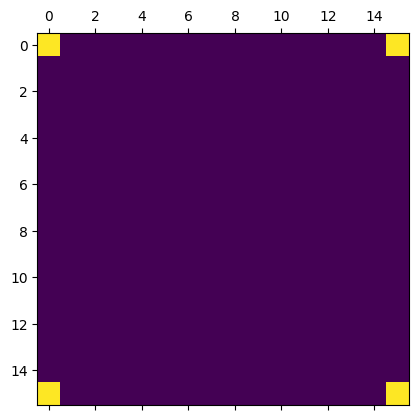

The density information: 


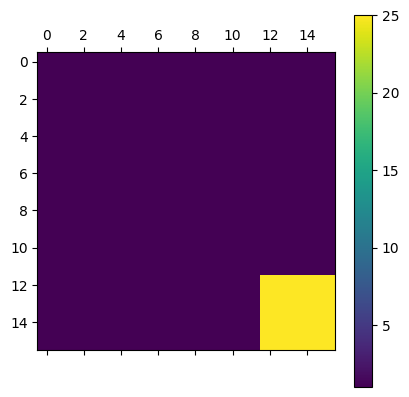

The initial closest locations: 


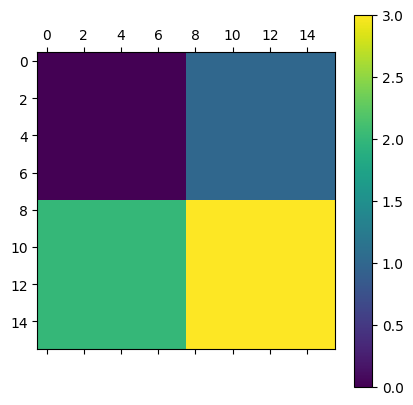

The final facility locations: 


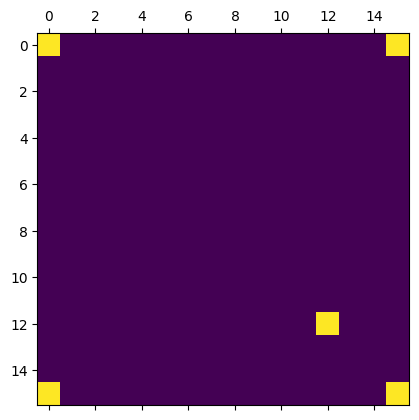

In [ ]:
import pygad
import numpy
import math
import matplotlib.pyplot as plt
import numpy as np

density = [ [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1,1,1,25,25,25,25],
            [1,1,1,1,1,1,1,1,1,1,1,1,25,25,25,25],
            [1,1,1,1,1,1,1,1,1,1,1,1,25,25,25,25],
            [1,1,1,1,1,1,1,1,1,1,1,1,25,25,25,25]]

locations = [[0,0],
            [0,15],
            [15,0],
            [15,15]]

contribution = [[0.0]*16 for i in range(16) ]
distanceToLocation = [[0.0]*16 for i in range(16)]

#print(contribution)

def distance(x1,y1,x2,y2):
      return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def calcContribution():
    for i in range(16):
        for j in range(16):
            closestDistance = math.inf
            for k in range(len(locations)):
                thisDistance = distance(i,j,locations[k][0],locations[k][1])
                if thisDistance < closestDistance:
                    closestDistance = thisDistance
            distanceToLocation[i][j] = closestDistance
            contribution[i][j] = closestDistance*density[i][j]


calcContribution()
print("Distances to the closest seed: ")
for i in range(16):
    for j in range(16):
        print("%.2f"%distanceToLocation[i][j],end=" ",)
    print()

print("----------------------")
print("Contribution to total cost: ")
for i in range(16):
    for j in range(16):
        print("%.2f"%contribution[i][j],end=" ",)
    print()


def fitness_func(ga_instance, solution, solution_idx):
    thisx = solution[0]
    thisy = solution[1]
    totalCost = 0.0
    for i in range(16):
        for j in range(16):
            thisDistance = distance(thisx,thisy,i,j)
            if thisDistance < distanceToLocation[i][j]:
                totalCost = totalCost + (thisDistance*density[i][j])
            else:
                totalCost = totalCost + contribution[i][j]
    return 1.0 / totalCost

function_input = [8,8]

fitness_function = fitness_func

num_generations = 20
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_input)

init_range_low = 0
init_range_high = 15

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 40

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

print("Predicted total cost: ",(1.0/solution_fitness))

# Initial location of the seeds
initial_facility_locations =np.zeros(shape=(16,16),dtype=np.uint16)

for i in range(len(locations)):
    initial_facility_locations[(locations[i][0])][(locations[i][1])] = 3
print("The initial facility locations: ")
plt.matshow(initial_facility_locations)
# plt.colorbar() # Add a colorbar to interpret the colors
plt.show()

# ga_instance.plot_fitness()
print("The density information: ")
plt.matshow(density)
plt.colorbar() # Add a colorbar to interpret the colors
plt.show()

# Calculate the initial distribution
initial_closest_locations = np.zeros(shape=(16,16),dtype=np.uint16)
for i in range(16):
    for j in range(16):
        closest_distance = math.inf
        closest_location = -1
        for k in range(len(locations)):
            this_distance = distance(i,j,locations[k][0],locations[k][1])
            if this_distance < closest_distance:
                closest_distance = this_distance
                closest_location = k
        initial_closest_locations[i][j] = closest_location
print("The initial closest locations: ")
plt.matshow(initial_closest_locations)
plt.colorbar() # Add a colorbar to interpret the colors
plt.show()
# Initial location of the seeds
final_facility_locations = initial_facility_locations.copy()
final_facility_locations[int(solution[0])][int(solution[1])] = 3
print("The final facility locations: ")
plt.matshow(final_facility_locations)


Distances to the closest seed: 
0.00 1.00 2.00 3.00 4.00 5.00 6.00 7.00 7.00 6.00 5.00 4.00 3.00 2.00 1.00 0.00 
1.00 1.41 2.24 3.16 4.12 5.10 6.08 7.07 7.07 6.08 5.10 4.12 3.16 2.24 1.41 1.00 
2.00 2.24 2.83 3.61 4.47 5.39 6.32 7.28 7.28 6.32 5.39 4.47 3.61 2.83 2.24 2.00 
3.00 3.16 3.61 4.24 5.00 5.83 6.71 7.62 7.62 6.71 5.83 5.00 4.24 3.61 3.16 3.00 
4.00 4.12 4.47 5.00 5.66 6.40 7.21 8.06 8.06 7.21 6.40 5.66 5.00 4.47 4.12 4.00 
5.00 5.10 5.39 5.83 6.40 7.07 7.81 8.60 8.60 7.81 7.07 6.40 5.83 5.39 5.10 5.00 
6.00 6.08 6.32 6.71 7.21 7.81 8.49 9.22 9.22 8.49 7.81 7.21 6.71 6.32 6.08 6.00 
7.00 7.07 7.28 7.62 8.06 8.60 9.22 9.90 9.90 9.22 8.60 8.06 7.62 7.28 7.07 7.00 
7.00 7.07 7.28 7.62 8.06 8.60 9.22 9.90 9.90 9.22 8.60 8.06 7.62 7.28 7.07 7.00 
6.00 6.08 6.32 6.71 7.21 7.81 8.49 9.22 9.22 8.49 7.81 7.21 6.71 6.32 6.08 6.00 
5.00 5.10 5.39 5.83 6.40 7.07 7.81 8.60 8.60 7.81 7.07 6.40 5.83 5.39 5.10 5.00 
4.00 4.12 4.47 5.00 5.66 6.40 7.21 8.06 8.06 7.21 6.40 5.66 5.00 4.47 4.12 4.